<h2><b>Introduction</b></h2>

In [ ]:
# Personal Loan Acceptance Prediction

Objective:
Predict which customers are likely to accept a personal loan offer using classification models
and generate business insights from their profile data.

🎯 Goal:
The goal is to build a predictive model that helps the bank identify and target potential customers
who are most likely to respond positively to a personal loan offer. This will support more
efficient marketing strategies, reduce customer churn, and increase conversion rates.


In [ ]:
# STEP 1: Libaries Import
import pandas as pd
import numpy as np


In [25]:
# STEP 2: Load and explore data

df = pd.read_csv('bank_marketing.csv')

# Basic exploration

print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


<h2><b>Visualization</b></h2>

<h2><b>Boxplot</b></h2>

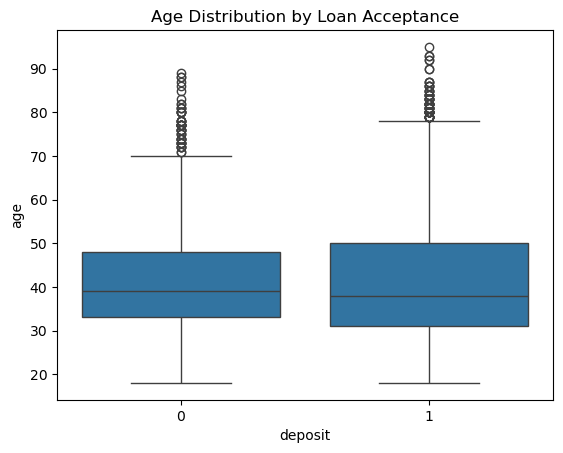

In [ ]:
# STEP 3: Exploratory Data Analysis (Visualization)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Age distribution by loan acceptance
plt.subplot(1, 1, 1)
sns.boxplot(x='deposit', y='age', data=df)
plt.title('Age Distribution by Loan Acceptance')

df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

<h2><b>Barplot</b></h2>

Text(0.5, 1.0, 'Top 10 Job Categories')

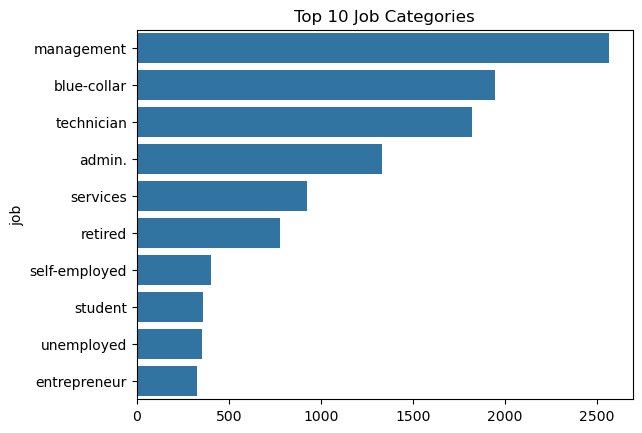

In [43]:
# Plot 2: Job categories distribution
plt.subplot(1, 1, 1)
job_counts = df['job'].value_counts().head(10)
sns.barplot(x=job_counts.values, y=job_counts.index)
plt.title('Top 10 Job Categories')

<h2><b>Countplot</b></h2>

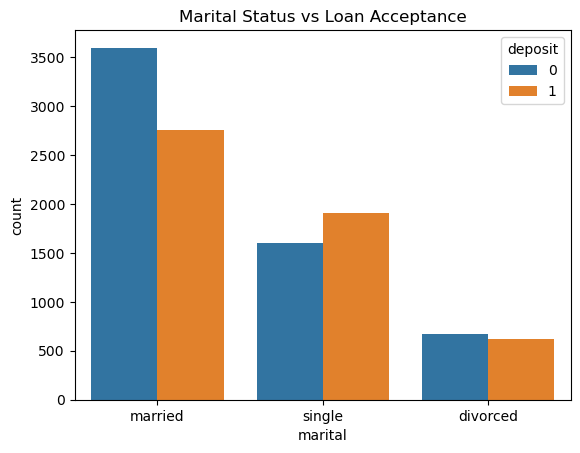

In [52]:
# Plot 3: Marital status distribution
plt.subplot(1, 1, 1)
sns.countplot(x='marital', hue='deposit', data=df)
plt.title('Marital Status vs Loan Acceptance')

<h2><b>Histogram</b></h2>

Text(0.5, 1.0, 'Account Balance Distribution')

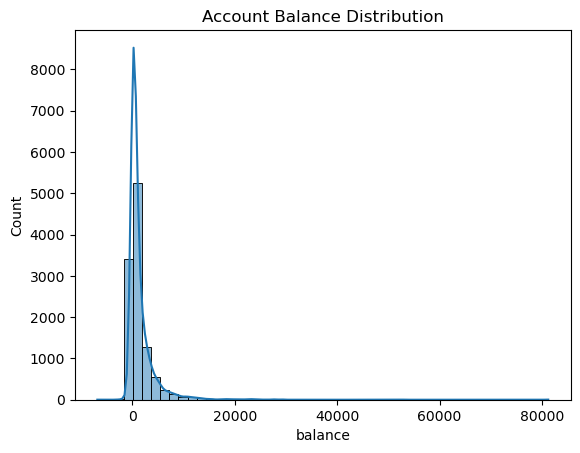

In [25]:
# Plot 4: Balance distribution
plt.subplot(1, 1, 1)
sns.histplot(df['balance'], bins=50, kde=True)
plt.title('Account Balance Distribution')


In [26]:
# STEP 5: Features Encoding 
import pandas as pd

# Columns to one-hot encode (multi-class categorical)
cat_cols = ['job', 'marital', 'education', 'contact', 
            'poutcome', 'month']

# Columns with yes/no or True/False
binary_cols = ['deposit', 'housing', 'loan', 'default']

# One-hot encode multi-class categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Convert all dummy columns (True/False) to 0/1
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# Convert yes/no columns to 0/1
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0, True: 1, False: 0})

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,0,0,0,1,0,0,0


<h2><b>Splitting Test-Train and Modelling </b></h2>

In [27]:
# STEP 6: Splitting Test and Train
from sklearn.model_selection import train_test_split

# 1 Define features and target
# Prepare X and y
X = df_encoded.drop(['deposit'], axis=1, errors='ignore')
y = df['deposit'].map({'yes': 1, 'no': 0})

# 2 Split into train and test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
# STEP 7 Logistic Regression (interpretable)
from sklearn.linear_model import LogisticRegression

# Train model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Get probabilities
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

import warnings
warnings.filterwarnings('ignore')

<h2><b>Evaluation</b></h2>

In [29]:
# STEP 8: Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Logistic Regression:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("AUC Score:", round(roc_auc_score(y_test, y_prob), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression:
Accuracy: 0.811
AUC Score: 0.8981

Confusion Matrix:
 [[981 185]
 [237 830]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1166
           1       0.82      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



<h2><b>Conclusion</b></h2>

In [ ]:
We built a supervised classification model using Logistic Regression to predict term deposit subscriptions.

Key Results:
- Achieved 81% accuracy with 90% AUC score
- Key predictive features: Some key features as Poutcome, Recent Contacts, duration and housing; plays a measure part in prediction.
- Simple model provides interpretable insights without complex tuning.
- Using models such as Random forest or XGBoost will help to capture more patterns. 